## <center>COMP20008 - 2018 - SM2 - Project Phase 1</center>
<center>Release Date: 11:59am Monday, $13^{th}$ August 2018</center>
<center>Due Date: 11:59am Friday, $31^{st}$ August 2018</center>
<center>Submission is via the LMS</center>
<span style="color:red">Please, make sure you get a submission confirmation email once you submit your assignment. Otherwise, it will be considered as a late submission.</span> 

#### Phase 1: Warmup - Python Exercises (20 marks, worth 20% of subject grade) 

In this phase, you will practice your Python wrangling skills with a publicly available dataset. The dataset is obtained through the TMDB (The Movie DB) API. It contains information on movies featured in the Full MovieLens Dataset and released on or before July 2017. The main features of the Movies Metadata file include posters, backdrops, budget, revenue, release dates, languages, production countries and companies. 

You will be working with the following dataset in this phase: 
- Movies\_tmdb.csv: It has a set of movie records (approx. 45,000), released **on or before July 2017**. Note that this dataset is quite large, and you may find it beneficial during development, to first test your code on a smaller sample of this data.

Libraries to use are Pandas and Matplotlib. You will need to write Python 3 code and work with Series and DataFrames discussed in workshop week 2 and data cleaning and basic visualisations covered in workshop weeks 3-4. If you are using other packages, you must provide an explanation in your code about why it is necessary.

### Import Required Python Libraries and Load the Data 

Please write here all the Python libraries you will be using! Also load the dataset (.csv) in a dataframe object.

In [1]:
# standard imports ....

import pandas as pd
import numpy as np
import json
import ast
import random
from matplotlib import cm
from pylab import *
import matplotlib.pyplot as plt
import calendar
import datetime
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from pandas.plotting import parallel_coordinates
%config InlineBackend.figure_format = 'svg' # higher quality graphics
%matplotlib inline
pd.options.mode.chained_assignment = None

raw_movies_df =  pd.read_csv("movies-sample.csv" ,low_memory=False, encoding = 'ISO-8859-1' )



### 1 Understanding the Dataset <span style="color:red">**(3 Marks)**</span> 

1.1 Print the number of movies, number of attributes/columns, column names and datatypes. The output of this step should look like **(2 Marks)** 

    *** 
    Q1.1 
    Number of movies: # 
    Number of attributes/columns: #
    Column names: #
    Column datatypes: #
    ***
where # is the values/strings you find.

In [2]:
### answer Q1.1
print ('***')
print ('Q1.1')
# printing the number of rows of  the data frame.
print ('Number of movies: ', raw_movies_df.shape[0] )
# printing the number of column of  the data frame.
print ('Number of attribute/columns: ', raw_movies_df.shape[1] )
movies_name= list(raw_movies_df.columns.values )
print ('Columns\' names are: ', ",".join([str(x) for x in movies_name] ))
print ('Columns\' datatypes: ', raw_movies_df.dtypes )
print ('***')

***
Q1.1
Number of movies:  27216
Number of attribute/columns:  37
Columns' names are:  adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
Columns' datatypes:  adult                       bool
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release

1.2 In this assignment, we won't be using all the features (i.e. columns) which are included in the csv file, so create a new dataframe with the following columns: **(1 Marks)** 

\begin{array} {|r|r|r|r|r|r|r|}
\hline
title & genre & release\_date & runtime & budget &  revenue & original\_language \\
\hline
\end{array}

\begin{array} {|r|r|r|r|r|r|}
\hline
popularity & vote\_average & vote\_count & adult & production\_countries \\
\hline
\end{array}

You must keep the order of the columns as provided above. 
Output of this question should be printing the first TWO rows (i.e. movies) from the new created dataframe in the following format:

    *** 
    Q1.2
    The first two rows from the filtered movies dataframe are:
    #
    #
    ***
    
where each # represents one movie row.


In [3]:
### answer Q1.2

# creating new dataframe with entries from the specified columns
movies_df = raw_movies_df.loc[:,['title','genres','release_date','runtime','budget',
              'revenue','original_language','popularity','vote_average'
             ,'vote_count','adult','production_countries']]
         
#displaying results
print ('***')
print ('Q1.2')
print ('The first two rows from the filtered movies dataframe are:')
#printing the top 2 rows
display(movies_df.head(2))
print ('***')



***
Q1.2
The first two rows from the filtered movies dataframe are:


title                                             genres release_date  \
0  Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...     30/10/95   
1    Jumanji  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...     15/12/95   

   runtime    budget      revenue original_language  popularity vote_average  \
0     81.0  30000000  373554033.0                en   21.946943          7.7   
1    104.0  65000000  262797249.0                en   17.015539          6.9   

   vote_count  adult                               production_countries  
0      5415.0  False  [{'iso_3166_1': 'US', 'name': 'United States o...  
1      2413.0  False  [{'iso_3166_1': 'US', 'name': 'United States o...

***


### 2 Missing Values and Data Types <span style="color:red">**(5 Marks)**</span>

2.1 Most of the columns in the movies dataframe have object datatype, let's convert the **"popularity"** column to float64 datatype, **"title"** column to string and **"adult"** column to boolean. **(1 Mark)**

The output of this step should print the datatypes of all columns in the movies dataframe after the conversion. You should follow the following format:

    *** 
    Q2.1 Datatypes after conversion:
    # 
    ***

where # should be the datatypes of the dataframe columns. Note: You don't have to create a new dataframe for this question, instead you can use the same dataframe which you created in Q1.2. 

In [4]:
### answer Q2.1
  
# changing the pandas object to the specified data type
movies_df["popularity"] = pd.to_numeric(movies_df["popularity"], errors="coerce")
#movies_df["title"] = movies_df["title"].astype(str)
movies_df["adult"] = movies_df["adult"].astype(bool)

#displaying results
print("***")
print("Q2.1 Datatypes after conversion:")
print(movies_df.dtypes)
print("***")



***
Q2.1 Datatypes after conversion:
title                    object
genres                   object
release_date             object
runtime                 float64
budget                    int64
revenue                 float64
original_language        object
popularity              float64
vote_average             object
vote_count              float64
adult                      bool
production_countries     object
dtype: object
***


2.2 Now, we will deal with the missing values as a preprocessing step before performing any further analysis. Let's first print the total number of missing values for each column separately. Following this, you should print the percentage of movies with incomplete data in any of its attributes (i.e. missing values). Note: A movie is considered incomplete record if it has a missed value in at least one of its features. **(2 Marks)**

Note: missing values might be 0, nan, or empty cell. 


    *** 
    Q2.2 Number of missing values per attribute:
    col_1: x 
    col_2: x
    ...
    col_n: x
    ***
    % of movies with incomplete data: #
    ***
Replace col_1,col_2 ... col_n with the columns' names, x with the calculated values, and # with the calculated percentage. 


In [5]:
### answer Q2.2

#selecting column whose values could be 0 and replacing the 0 values with nan
movies_df[["runtime", "budget", "revenue"]] = movies_df[["runtime", "budget", "revenue"]].replace({0:np.nan})
movies_df = movies_df.replace('[]', np.nan)

nan_per_col=movies_df.isnull().sum()
col_names =movies_df.columns.values.tolist()

x=0

#printig number of missing values for each column
print ('***')
print ('Q2.2 Number of missing values per attribute:')
for col in movies_df:
   
    print (str(col_names[x]) +': ' + str(nan_per_col[x]))
    x=x+1
    

#total number of row with missing dataset
incompletes = (movies_df.isnull().sum(axis=1)>0).sum()

movies_df['genres'] = movies_df['genres'].replace(np.nan, '[]')
movies_df['production_countries'] = movies_df['production_countries'].replace(np.nan, '[]')

print ('***')
print ('% of movies with incomplete data:',round ((float(incompletes)/movies_df.shape[0]*100), 3))
print ('***')





***
Q2.2 Number of missing values per attribute:
title: 2
genres: 1493
release_date: 54
runtime: 1088
budget: 21823
revenue: 22735
original_language: 5
popularity: 2
vote_average: 2
vote_count: 3
adult: 0
production_countries: 3753
***
% of movies with incomplete data: 88.11
***


2.3 Write code that will add a new column called "runtime_non_missing" to the movies dataframe. The values in the new column should be copied from the "runtime" column and replaces all missing values in this column with the average of non-missing values for that column. **(2 Marks)**. 

The output of this question should print the average calculated value in the following format:
    
    *** 
    Q2.3 Missing values in 'runtime' column are replaced with: 
    #
    ***

Where # is the calculated value. 

Do you think it will be better to replace the missing values in the "runtime" column with the median instead of the average? Yes/No - Why? 

In [6]:
### answer Q2.3 
# changing data type of runtime column
# this step has already been done before
#movies_df["runtime"]= pd.to_numeric(movies_df["runtime"], errors='coerce')

#creating new column
movies_df['runtime_non_missing'] = movies_df['runtime']

#replacing all missing values  with the average of non-missing values.
missing_replacement_val = movies_df['runtime_non_missing'].mean()
movies_df['runtime_non_missing'].fillna(missing_replacement_val, inplace=True)


print ('***')
print ('Q2.3 Missing values in \'runtime\' column are replaced with: ' )
print (round (missing_replacement_val, 3))
print ('***')


***
Q2.3 Missing values in 'runtime' column are replaced with: 
97.369
***


### 3 Cleaning Dataset <span style="color:red">**(8 Marks)**</span>

3.1 In this question, you will deal with the datetime datatype. The question has three parts as following:  **(4 Marks)**.

Dealing with data formats is an essential step in the data wrangling pipeline. One of the issues is that data entry might be inconsistent. For example, by looking at the "release_date" column, you will find two different formats for the date value: '%m/%d/%Y' and '%Y-%m-%d'. Write code which converts the "release_date" into datetime datatype and <span style="color:blue"> consider reading both formats correctly. </span> The final datetime format should be '%m/%d/%Y'.

Another issue is the wrong values for some of these dates, for example some movies have the "release_date" after July 2017. However, in the description of the dataset, it says the collected movies released on or before July 2017. To deal with this issue, write code which removes any suspicious records (i.e. any movie which has a "release_date" after July 2017). 

In this assignment, we are not interested in analysing movies released before 1990. Therefore, as a preparation for our next questions, we only want to keep movies with release date between Jan 1990 and July 2017 (inclusive, i.e. Jan 1990 $\le$ release_date $\le$ July 2017) in the movies dataframe. So write code to delete all movies released outside this interval or has a nan/empty "release_date". You should display the number of the records (i.e. movies) in the final filtered movies dataframe. 

The output of this question should be in the following format:

    *** 
    Q3.1 
    The number of movies with release date between Jan-1990 and July-2017: #
    ***

Where # is the calculated number.

#### <span style="color:orange"> Note: The resulting dataframe will be used to answer the remaining questions.</span>

In [7]:
frmt1= '%d/%m/%y'
frmt2 = '%Y-%m-%d'
new_movie = movies_df.copy()

# 1) create new column temp_release_date and store there datetimes recognized using first format

new_movie['temp_release_date'] = pd.to_datetime(new_movie['release_date'], format=frmt1, errors='coerce')
# 2) get not recognized rows
not_recongized = new_movie[new_movie.temp_release_date.isna()]
print(not_recongized.shape)
# 3) inplace fill not recognized rows with values recognized using second format
new_movie['temp_release_date'].fillna(pd.to_datetime(not_recongized['release_date'], format=frmt2, errors='coerce'), inplace=True)
# 4) delete release_date column
del new_movie['release_date']
# 5) inplace rename temp_release_date to release_date
new_movie.rename(columns={"temp_release_date": "release_date"}, inplace=True)

cond1 = new_movie['release_date'].dt.date >= datetime.date(1990, 1, 1)
cond2 = new_movie['release_date'].dt.date <= datetime.date(2017, 7, 31)

movies_df_yrFiltered = new_movie[(cond1 & cond2)]
print("***")
print("Q3.1")
print("The number of movies with release date between Jan-1990 and July-2017:", movies_df_yrFiltered.shape[0])
print("***")



(98, 14)
***
Q3.1
The number of movies with release date between Jan-1990 and July-2017: 17853
***


3.2 You might have noticed that the data of the genres column is represented as a list of dictionaries. Let's change this format into an easier one. Write code to convert the values of genres column into a list of strings instead of a list of dictionaries, keeping only the value of the "name" attribute. For example, the value <span style="color:blue"> [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]</span> should be <span style="color:green">['Animation','Comedey','Family']</span>. The newly converted values should be stored in an extra new column called "genres_cleaned". **(4 Marks)**. 

You should display the first 5 rows of the movies dataframe after adding this new column. The output of this question should be in the following format:

    *** 
    Q3.2
    The first 5 rows after adding the "genres_cleaned" column are:
    #
    ***

where # is the first 5 rows in the movies dataframe.

In [8]:
### answer Q3.2

# iterating over the json object to extract name entity
my_ls=[]
for r  in movies_df_yrFiltered["genres"]:    
        r= r.replace("'",'"')
        d = json.loads(r)
        ls=[]
        for number in d:
           
            ls.append(number['name'])
       
        my_ls.append(ls)
#creating new column
movies_df_yrFiltered["genres_cleaned"]=my_ls
            

print ('***')
print ('Q3.2')
print ('The first 5 rows after adding the "genres_cleaned" column are:')
display (movies_df_yrFiltered.head(5))
print('***')




***
Q3.2
The first 5 rows after adding the "genres_cleaned" column are:


title  \
0                    Toy Story   
1                      Jumanji   
2            Waiting to Exhale   
3  Father of the Bride Part II   
4                         Heat   

                                              genres  runtime      budget  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...     81.0  30000000.0   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...    104.0  65000000.0   
2  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...    127.0  16000000.0   
3                     [{'id': 35, 'name': 'Comedy'}]    106.0         NaN   
4  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...    170.0  60000000.0   

       revenue original_language  popularity vote_average  vote_count  adult  \
0  373554033.0                en   21.946943          7.7      5415.0  False   
1  262797249.0                en   17.015539          6.9      2413.0  False   
2   81452156.0                en    3.859495          6.1        34.0  False   
3   76578911.0                en    8.387519          5.7       173.0  False   
4  187436818.0                en   17.924927          7.7      1886.0  False   

                                production_countries  runtime_non_missing  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...                 81.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...                104.0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...                127.0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...                106.0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...                170.0   

  release_date                    genres_cleaned  
0   1995-10-30       [Animation, Comedy, Family]  
1   1995-12-15      [Adventure, Fantasy, Family]  
2   1995-12-22          [Comedy, Drama, Romance]  
3   1995-02-10                          [Comedy]  
4   1995-12-15  [Action, Crime, Drama, Thriller]

***


### 4 Basic statistics, summary and grouping <span style="color:red">**(10 Marks)**</span>

4.1 Write code that calculates the median and average of non-missing values in the budget column for movies released between 2000 and 2010 (inclusive, i.e. 2000 $\le$ release_year $\le$ 2010). **(2 Marks)**.

Your code should print out the results with the following format:
    
    ***
    Q4.1: Movies budget (2000-2010)
    Median: # 
    Average: # 
    ***
    
where # is the calculated values <span style="color:blue">rounded to 1 decimal place</span>.

In [9]:
### answer Q4.1
movies_df_yrFiltered['budget'] = movies_df_yrFiltered['budget'].astype(float)

mask_yr = (movies_df_yrFiltered['release_date'].dt.year >= 2000) & (movies_df_yrFiltered['release_date'].dt.year <= 2010)
mask_bgt = (movies_df_yrFiltered["budget"] > 0)

# extract budget of the specified movies
result_df = movies_df_yrFiltered.loc[(mask_yr & mask_bgt)]

# calculating mean and median
print("***")
print("Q4.1: Movies budget (2000-2010)")
print("Median:", round(result_df["budget"].median(), 1))
print("Average:", round(result_df["budget"].mean(), 1))
print("***")

***
Q4.1: Movies budget (2000-2010)
Median: 12000000.0
Average: 26255133.5
***


4.2 Write code that returns a "popular_movies" dataframe with the most popular movie for each year since 2000. This means the dataframe will contain 18 movie, one for each year from 2000 till 2017). The dataframe should also contain the following columns: "title", "release\_date", "runtime" , "original\_language", "popularity". Also, the dataframe should be sorted by the "popularity" values in **descending** order. **(2 Marks)**.

Your code should print out the popular_movies dataframe in the following format:

    ***
    Q4.2: Most popular movies (2000-2017):
\begin{array} {lllll}
\\
\text{title} & \text{release date} & \text{runtime} & \text{language} & \text{popularity} \\
\# &&&& \\
\# &&&& \\
\# &&&& \\
.  &&&& \\
.  &&&& \\
.  &&&& \\
\# &&&& \\
\end{array}

    ***
where each # represents one row in the popular_movies dataframe.

In [10]:
### answer Q4.2
mask = (movies_df_yrFiltered['release_date'].dt.year >= 2000) & (movies_df_yrFiltered['release_date'].dt.year <= 2017)
movies_btw_range = movies_df_yrFiltered.loc[mask,["title", "release_date", "runtime", "original_language", "popularity"]]

movies_groupBy_yr = movies_btw_range.groupby(movies_btw_range["release_date"].dt.year)

most_popular_movies = movies_btw_range.loc[movies_groupBy_yr.popularity.idxmax()].copy()
sorted_most_popular_movies = most_popular_movies.sort_values(by='popularity', ascending=False)

    
    
print("***")
print("Q4.2: Most popular movies (2000-2017):")
display (sorted_most_popular_movies)

print("***")




***
Q4.2: Most popular movies (2000-2017):


title release_date  runtime  \
18375                                        Minions   2015-06-17     91.0   
19925                                   Wonder Woman   2017-05-30    141.0   
14654                                     Big Hero 6   2014-10-24    102.0   
15911                                       Deadpool   2016-02-09    108.0   
8772                                          Avatar   2009-12-10    162.0   
10746                                   The Avengers   2012-04-25    143.0   
10611                 Rise of the Planet of the Apes   2011-08-03    105.0   
3325                                   Spirited Away   2001-07-20    125.0   
13163                           Thor: The Dark World   2013-10-29    112.0   
7805                             The Mother of Tears   2007-09-06    102.0   
9285                      The Twilight Saga: Eclipse   2010-06-23    124.0   
7931                                        Twilight   2008-11-20    122.0   
6651      Pirates of the Caribbean: Dead Man's Chest   2006-06-20    151.0   
3520           The Lord of the Rings: The Two Towers   2002-12-18    179.0   
4239   The Lord of the Rings: The Return of the King   2003-12-01    201.0   
6110                                   Batman Begins   2005-06-10    140.0   
4661        Harry Potter and the Prisoner of Azkaban   2004-05-31    141.0   
2093                                       Gladiator   2000-05-01    155.0   

      original_language  popularity  
18375                en  547.488298  
19925                en  294.337037  
14654                en  213.849907  
15911                en  187.860492  
8772                 en  185.070892  
10746                en   89.887648  
10611                en   41.613762  
3325                 ja   41.048867  
13163                en   34.905447  
7805                 it   34.145916  
9285                 en   34.047399  
7931                 en   31.282029  
6651                 en   29.455314  
3520                 en   29.423537  
4239                 en   29.324358  
6110                 en   28.505341  
4661                 en   28.460276  
2093                 en   23.186667

***


4.3 In this question, we will be working with the "vote\_average" and "vote\_count" columns. Write the code that returns the "title", "vote\_average", "vote\_count" of the 10 lowest voted average movies with at least 400 voters (i.e. "vote\_count)". The 10 movies should be displayed in ascending order by the "vote\_average" values. **(2 Marks)**.

Your code should print out the lowest voted average movies in the following format:

    ***
    Q4.3: The 10 movies with the lowest vote average are:
\begin{array} {lll}
\\
\text{title} & \text{vote average} & \text{vote count} \\
\# && \\
\# && \\
\# && \\
.  && \\
.  && \\
.  && \\
\# && \\
\end{array}

    ***
where each # represent one of the 10 movies.

In [11]:
### answer Q4.3

# mask movies with atleast 400 votes
mask = (movies_df_yrFiltered["vote_count"] >= 400)

# sorting movies based on voteaverage 
df_results = movies_df_yrFiltered.loc[mask,["title", "vote_average", "vote_count"]].sort_values(by="vote_average")
print("***")
print("Q4.3: The 10 movies with the lowest vote average are:")
display(df_results.head(10))
print("***")

***
Q4.3: The 10 movies with the lowest vote average are:


title vote_average  vote_count
8179               Dragonball Evolution          2.9       475.0
12756                         Sharknado          3.8       484.0
16894                 The Boy Next Door          4.1      1034.0
897             Speed 2: Cruise Control          4.1       439.0
900                      Batman & Robin          4.2      1447.0
4790                           Catwoman          4.2       833.0
15910                    Fantastic Four          4.4      2322.0
13845            The Legend of Hercules          4.4       542.0
8320                           Year One          4.6       538.0
11216  Ghost Rider: Spirit of Vengeance          4.7      1163.0

***


4.4 Write code to display the count of movies for the top three movie production countries since Feb-2005 (i.e. Feb-2005 $\le$ release_date). **(4 Marks)**.

Your code should print out the result in the following format:
    
    ***
    Q4.4: Top 3 Movie Production Countries since Feb-2005:

\begin{array} {ll}
\\
\text{Country} & \text{Count of Produced Movies} \\
x & y \\
x & y \\
x & y \\
\end{array} 
 
    ***
    
where x represents the country name and y is the count of movies produced by this country.

In [12]:
### answer Q4.4
# function to get the name of countries of movie production
def get_production(entry):
        contry = ast.literal_eval(entry)
        return [x["name"] for x in contry]

# selecting movies with in the specified range
start_period = datetime.date(2005, 2, 1) 
# end_period = pd.Timestamp("2018-01-01") No need sinnce the dataframe is already cleaned (i.e. no movies after 2017)
mask = (movies_df_yrFiltered['release_date'].dt.date >= start_period) #& (new_movie['release_date'].dt.date < end_period.date())

# get the name of countries of movie production
movies_df_yrFiltered["country"] = movies_df_yrFiltered["production_countries"].apply(get_production)


popular_m = pd.DataFrame({"Country": np.concatenate(movies_df_yrFiltered.loc[mask,"country"].values)})
popular_m['Count of Produced Movie']=1
# group the data frame based on country of production and counting number of entries in each group
print("***")
print("Q4.4: Top 3 Movie Production Countries since Feb-2005:")
print (popular_m.groupby('Country').sum().sort_values(by="Count of Produced Movie", ascending=False).head(3))
print ('***')

***
Q4.4: Top 3 Movie Production Countries since Feb-2005:
                          Count of Produced Movie
Country                                          
United States of America                     4844
France                                        979
United Kingdom                                949
***


### 5 Visualization <span style="color:red">**(13 Marks)**</span>
5.1 Boxplots **(2 Marks)**.

Draw a plot consisting of two boxplots. One boxplot to show the distribution of revenue for adult movies. One boxplot to show the distribution of revenue for other non-adult movies. Note: You should not include movies with zero-revenue in the box-plot.

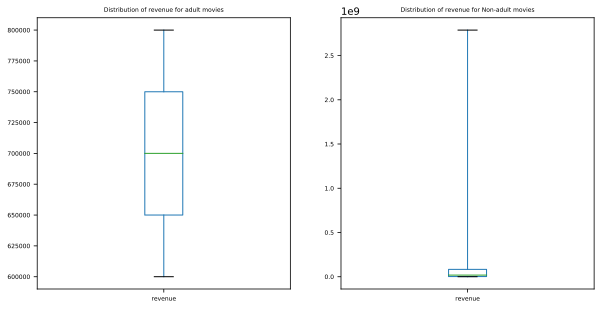

In [13]:
### answer Q5.1

# extracting adult movies mask from the dataframe, where revenue is not null.
mask_adult_movies = (movies_df_yrFiltered["adult"]==True) & (movies_df_yrFiltered["revenue"].notnull())

# extracting other movies data from the dataframe, where revenue is not null.
mask_other_movies = (movies_df_yrFiltered["adult"]==False) & (movies_df_yrFiltered["revenue"]>0)
fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title("Distribution of revenue for adult movies", size=6)
movies_df_yrFiltered.loc[mask_adult_movies,"revenue"].plot(kind="box" , whis='range')
plt.tick_params(axis='both', which='major', labelsize=6)
plt.tick_params(axis='both', which='minor', labelsize=6)

plt.subplot(1, 2, 2)
plt.title("Distribution of revenue for Non-adult movies", size=6)
movies_df_yrFiltered.loc[mask_other_movies,"revenue"].plot(kind="box", whis='range')

plt.tick_params(axis='both', which='major', labelsize=6)
plt.tick_params(axis='both', which='minor', labelsize=6)


plt.show()



5.2 Histogram **(2 Marks)**

Draw a bar plot showing month of year (x-axis) versus total number of movies released on that month (y-axis). Each bar will represent the total number of movies released on a specific month across all years. 

Is there any relation between the month of the year and the total number of movies? Yes/No - Explain?

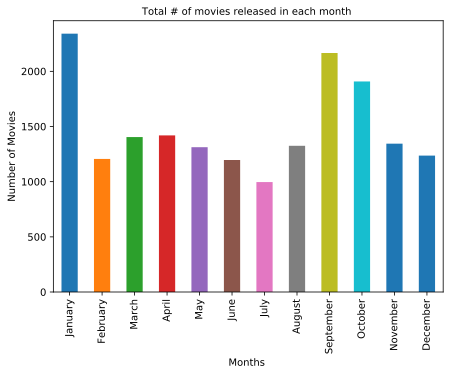

In [14]:
### answer code Q5.2


#grouping dataframes based on movies release date month
movies_count=movies_df_yrFiltered.groupby(movies_df_yrFiltered["release_date"].dt.month).size()

# getting month names
name_months=[]
for month_idx in range(1, 13):
    name_months.append(calendar.month_name[month_idx])

df_results = pd.DataFrame({'movies_count': movies_count, 'months': name_months})


#plotting number of movies released in each data frame
ax = df_results.plot(x="months", y="movies_count", kind='bar', figsize=(7, 5), legend=False, fontsize=10 ,rot=90)
ax.set_xlabel("Months ", fontsize=10 )
ax.set_ylabel("Number of Movies", fontsize=10)
ax.set_title("Total # of movies released in each month ", size=10)

plt.show()





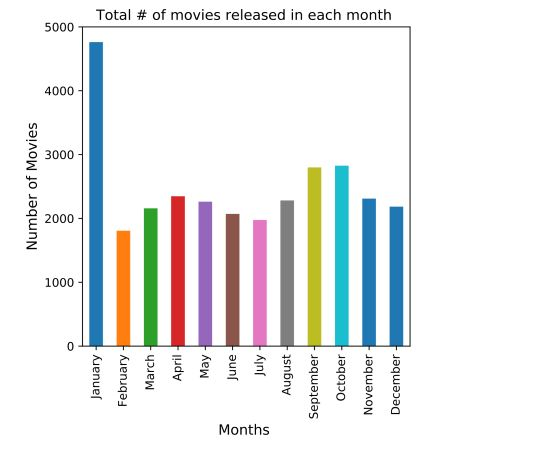

In [15]:
# graph for original  movie file:
from IPython.display import Image
Image("original_s.png")

5.3 Scatter plot **(3 Marks)**

In this question, we will analyze the relation between few columns in the movies dataset. Draw four plots with the following four scatter/line plots:
    
    1- Non-zero revenue movies (x-axis) versus number of genres.
    2- Non-zero revenue movies (x-axis) versus release year.
    3- Non-zero revenue movies (x-axis) versus runtime.
    4- Non-zero revenue movies (x-axis) versus vote average.
    
Pick one of the four plots and justify/explain the relation between the two attributes. You should mention whether the relation is positive, negative or random. Did you expect this type of relation, Yes/No? Why?

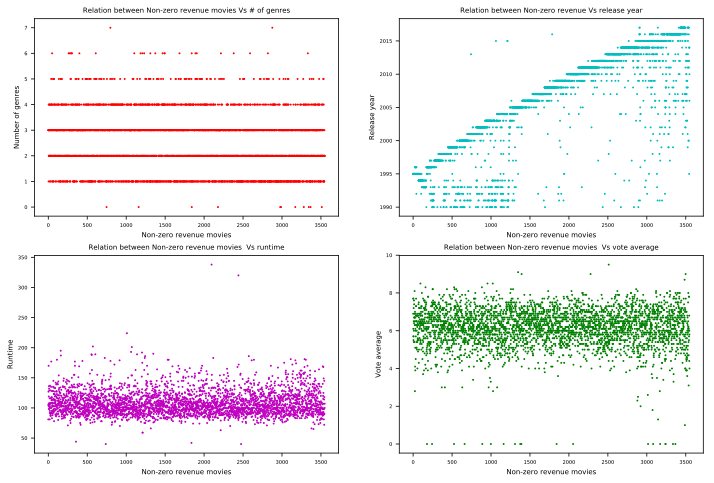

In [16]:
### answer Q5.3

movies_df_yrFiltered["revenue"] = movies_df_yrFiltered["revenue"].astype(np.float)
movies_df_yrFiltered["vote_average"] = movies_df_yrFiltered["vote_average"].astype(np.float)
#selecting movies whose revenue is non zero
mask_non_zero = movies_df_yrFiltered["revenue"] > 0
##########################################X-AXIS--> REVENUE VALUE ######################################
x= np.arange(np.sum(mask_non_zero))

num_genre=[]
# counting num of genre of each movie
for entry in movies_df_yrFiltered.loc[mask_non_zero,'genres_cleaned']:
    num_genre.append(len(entry))
#plotting scatter plot
fig = plt.figure(figsize=(12,8))
sz= 7
sz_label=5
plt.subplot(2, 2, 1)


plt.scatter(x, num_genre,marker ='.',c='r',s=4)
plt.xlabel("Non-zero revenue movies" ,size=sz)
plt.ylabel("Number of genres" ,size=sz)
plt.title("Relation between Non-zero revenue movies Vs # of genres", size=sz)
plt.tick_params(axis='both', which='major', labelsize=sz_label)
plt.tick_params(axis='both', which='minor', labelsize=sz_label)

plt.subplot(2, 2, 2)

#grouping movies based on release year
release_year = movies_df_yrFiltered.loc[mask_non_zero,"release_date"].dt.year
plt.scatter(x,release_year,marker ='.',c='c',s=4)
plt.xlabel("Non-zero revenue movies",size=sz)
plt.ylabel("Release year",size=sz)
plt.title("Relation between Non-zero revenue Vs release year", size=sz)
plt.tick_params(axis='both', which='major', labelsize=sz_label)
plt.tick_params(axis='both', which='minor', labelsize=sz_label)

plt.subplot(2, 2, 3)

runtime_nonzero= movies_df_yrFiltered.loc[mask_non_zero,"runtime"]
plt.scatter(x,runtime_nonzero,marker ='.',c='m',s=4)
plt.xlabel("Non-zero revenue movies",size=sz)
plt.ylabel("Runtime" ,size=sz)
plt.title("Relation between Non-zero revenue movies  Vs runtime", size=sz)
plt.tick_params(axis='both', which='major', labelsize=sz_label)
plt.tick_params(axis='both', which='minor', labelsize=sz_label)




plt.subplot(2, 2, 4)

vote_avg_nonzero= movies_df_yrFiltered.loc[mask_non_zero,"vote_average"]
plt.scatter(x,vote_avg_nonzero,marker ='.',c='g',s=4)
plt.xlabel("Non-zero revenue movies" ,size=sz)
plt.ylabel("Vote average" ,size=sz)

plt.yticks()
plt.title("Relation between Non-zero revenue movies  Vs vote average", size=sz)
plt.tick_params(axis='both', which='major', labelsize=sz_label)
plt.tick_params(axis='both', which='minor', labelsize=sz_label)


plt.show()


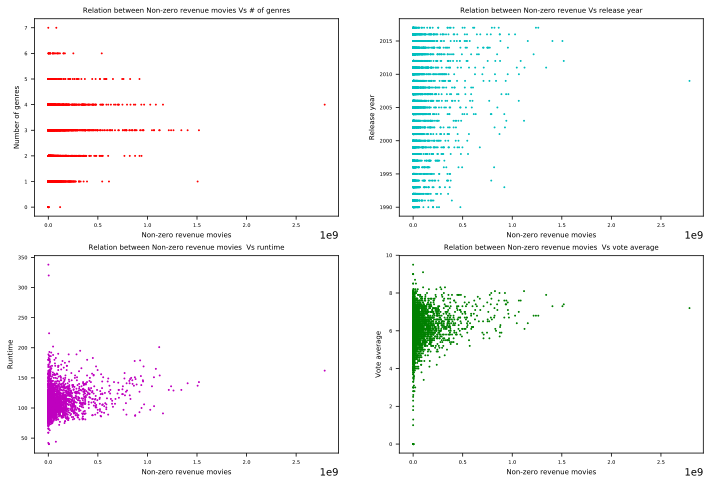

In [17]:
### answer Q5.3

movies_df_yrFiltered["revenue"] = movies_df_yrFiltered["revenue"].astype(np.float)
movies_df_yrFiltered["vote_average"] = movies_df_yrFiltered["vote_average"].astype(np.float)

#mask for movies with non zero revenue is

mask_non_zero = movies_df_yrFiltered["revenue"] > 0
##########################################X-AXIS--> REVENUE VALUE ######################################
x = movies_df_yrFiltered.loc[mask_non_zero,'revenue']

num_genre=[]
# counting num of genre of each movie
for entry in movies_df_yrFiltered.loc[mask_non_zero,'genres_cleaned']:
    num_genre.append(len(entry))
#plotting scatter plot
fig = plt.figure(figsize=(12,8))
sz= 7
sz_label=5
plt.subplot(2, 2, 1)


plt.scatter(x, num_genre,marker ='.',c='r',s=4)
plt.xlabel("Non-zero revenue movies" ,size=sz)
plt.ylabel("Number of genres" ,size=sz)
plt.title("Relation between Non-zero revenue movies Vs # of genres", size=sz)
plt.tick_params(axis='both', which='major', labelsize=sz_label)
plt.tick_params(axis='both', which='minor', labelsize=sz_label)

plt.subplot(2, 2, 2)

#grouping movies based on release year
release_year = movies_df_yrFiltered.loc[mask_non_zero,"release_date"].dt.year
plt.scatter(x,release_year,marker ='.',c='c',s=4)
plt.xlabel("Non-zero revenue movies",size=sz)
plt.ylabel("Release year",size=sz)
plt.title("Relation between Non-zero revenue Vs release year", size=sz)
plt.tick_params(axis='both', which='major', labelsize=sz_label)
plt.tick_params(axis='both', which='minor', labelsize=sz_label)

plt.subplot(2, 2, 3)

runtime_nonzero= movies_df_yrFiltered.loc[mask_non_zero,"runtime"]
plt.scatter(x,runtime_nonzero,marker ='.',c='m',s=4)
plt.xlabel("Non-zero revenue movies",size=sz)
plt.ylabel("Runtime" ,size=sz)
plt.title("Relation between Non-zero revenue movies  Vs runtime", size=sz)
plt.tick_params(axis='both', which='major', labelsize=sz_label)
plt.tick_params(axis='both', which='minor', labelsize=sz_label)




plt.subplot(2, 2, 4)

vote_avg_nonzero= movies_df_yrFiltered.loc[mask_non_zero,"vote_average"]
plt.scatter(x,vote_avg_nonzero,marker ='.',c='g',s=4)
plt.xlabel("Non-zero revenue movies" ,size=sz)
plt.ylabel("Vote average" ,size=sz)
plt.title("Relation between Non-zero revenue movies  Vs vote average", size=sz)
plt.tick_params(axis='both', which='major', labelsize=sz_label)
plt.tick_params(axis='both', which='minor', labelsize=sz_label)


plt.show()


5.4 Pie chart **(2 Marks)**

Create a pie chart showing the number of movies for each genre. For example, if a movie is classified as both comedey and action then the count for each of the action and comedey slices should be increased by 1. Each slice of the pie should have a different colour and contain a percentage number listing its relative size. Also, each slice of the pie should have a label next to it indicating which genre it corresponds to.

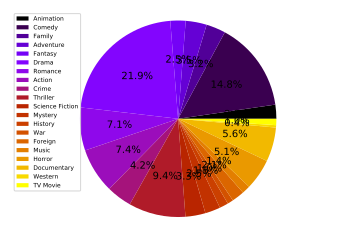

In [18]:
### answer Q5.4


#counting movies with same genre
genre_counts={}
for entry in movies_df_yrFiltered['genres_cleaned']:
    for item in entry:
        genre_counts[item] = genre_counts.get(item,0)+1

#convert genre_counts from dict to series
pie_data = pd.Series(genre_counts)
labels = pie_data.index
sizes = pie_data.values


#plt.get_cmap('gist_rainbow')
cmap = plt.get_cmap('gnuplot')

#cmap = plt.get_cmap('gnuplot')
cs= [cmap(i) for i in np.linspace(0, 1, 20)]


plt.pie(pie_data,explode=None,colors=cs,autopct='%1.1f%%')
plt.legend(labels, loc="upper left",  prop={'size': 6})
plt.axis('equal')


plt.show()




5.5 Parallel co-ordinates **(4 Marks)**

In this question, we will the parallel co-ordinates plot to visualize the trend/relation between some of the features in the movies dataset. You should write the code that implements the following steps:

1. Delete all movies (rows) with missing values in any of the following features: budget, runtime, popularity, vote_average, and revenue. 

2. Then for each of the features, normalise its values to lie within the range [0-1] (0 to 1 inclusive). Use the the following formula for normalising a feature:

** $newvalue = (oldvalue - min) / (max - min) $ ** where min is the minimum value for the feature, max is the maximum value for the feature, newvalue is the normalised value for the feature and oldvalue is the old (un-normalised value).

3. Using these normalised features, compute the mean budget, runtime, popularity, vote_average, and revenue for each year. 

4. Finally, draw a parallel co-ordinates plot, each line correspondes to a different year. The ordering of the features for the plot should be budget(leftmost), runtime, popularity, vote_average, and revenue(rightmost). 

Colour the movies with $release\_year < 2000$ in red,  $2000 \geqslant release\_year < 2010 $ in green and $release\_year \geqslant 2010$ in blue. Provide a legend mapping colours to day type.

From the plot, can you see any relation between the revenue and popularity features? Yes/No- Explain? 

In [22]:
### answer Q5.5

# Delete all movies (rows) with missing values

mask = ((movies_df_yrFiltered["budget"]>0) & (movies_df_yrFiltered["runtime"]>0) & (movies_df_yrFiltered["popularity"]>0) & (movies_df_yrFiltered["vote_average"]>0) & (movies_df_yrFiltered["revenue"]>0))

df_results = movies_df_yrFiltered.loc[mask,['budget','runtime','popularity','vote_average','revenue']]
df_results['release_year'] = movies_df_yrFiltered.loc[mask,'release_date'].dt.year

# columns have already been converted to numeric before

#normalizing data
df_results['budget'] = (df_results['budget']-df_results['budget'].min())/(df_results['budget'].max()-df_results['budget'].min())
df_results['runtime'] = (df_results['runtime']-df_results['runtime'].min())/(df_results['runtime'].max()-df_results['runtime'].min())
df_results['popularity'] = (df_results['popularity']-df_results['popularity'].min())/(df_results['popularity'].max()-df_results['popularity'].min())
df_results['vote_average'] = (df_results['vote_average']-df_results['vote_average'].min())/(df_results['vote_average'].max()-df_results['vote_average'].min())
df_results['revenue'] = (df_results['revenue']-df_results['revenue'].min())/(df_results['revenue'].max()-df_results['revenue'].min())

df_results = df_results.groupby(df_results.release_year).agg(['mean']).reset_index()

df_results.loc[(df_results['release_year'] <2000),'selected'] = 'Before 2000'
df_results.loc[((df_results['release_year'] >=2000)&(df_results['release_year'] <=2010)),'selected'] = '2000-2010'
df_results.loc[(df_results['release_year'] >2010),'selected'] = 'After 2000'

df_results

release_year    budget   runtime popularity vote_average   revenue  \
                     mean      mean       mean         mean      mean   
0          1990  0.058248  0.217664   0.016584     0.597899  0.026423   
1          1991  0.055053  0.235911   0.013210     0.566020  0.017622   
2          1992  0.058822  0.231458   0.015593     0.567373  0.022691   
3          1993  0.052636  0.230720   0.015718     0.586460  0.027672   
4          1994  0.073301  0.214316   0.018209     0.547488  0.035634   
5          1995  0.074922  0.234951   0.016599     0.581328  0.024096   
6          1996  0.082218  0.235957   0.015748     0.567186  0.032416   
7          1997  0.090922  0.236636   0.014600     0.580450  0.024985   
8          1998  0.089646  0.223161   0.015412     0.568832  0.028505   
9          1999  0.108234  0.231786   0.017257     0.582001  0.034956   
10         2000  0.097667  0.233305   0.016125     0.566689  0.031826   
11         2001  0.096648  0.237708   0.016283     0.564143  0.031992   
12         2002  0.091707  0.221776   0.015313     0.566636  0.032427   
13         2003  0.112357  0.228557   0.017094     0.575776  0.045934   
14         2004  0.109644  0.230716   0.017273     0.563118  0.040896   
15         2005  0.105761  0.230966   0.016843     0.578913  0.033102   
16         2006  0.096614  0.223402   0.015855     0.577041  0.032130   
17         2007  0.104226  0.223934   0.017066     0.582257  0.037394   
18         2008  0.103346  0.225634   0.015742     0.562077  0.031613   
19         2009  0.095901  0.227729   0.017917     0.570023  0.041548   
20         2010  0.089035  0.224299   0.015309     0.583878  0.035845   
21         2011  0.101206  0.227545   0.015756     0.565000  0.037480   
22         2012  0.092192  0.228081   0.016999     0.554824  0.041637   
23         2013  0.100184  0.238763   0.017640     0.580243  0.037173   
24         2014  0.097610  0.229680   0.029604     0.580174  0.042620   
25         2015  0.094184  0.235054   0.028494     0.578235  0.045828   
26         2016  0.102920  0.241973   0.024463     0.605444  0.043452   
27         2017  0.187196  0.240936   0.086667     0.610115  0.095972   

       selected  
                 
0   Before 2000  
1   Before 2000  
2   Before 2000  
3   Before 2000  
4   Before 2000  
5   Before 2000  
6   Before 2000  
7   Before 2000  
8   Before 2000  
9   Before 2000  
10    2000-2010  
11    2000-2010  
12    2000-2010  
13    2000-2010  
14    2000-2010  
15    2000-2010  
16    2000-2010  
17    2000-2010  
18    2000-2010  
19    2000-2010  
20    2000-2010  
21   After 2000  
22   After 2000  
23   After 2000  
24   After 2000  
25   After 2000  
26   After 2000  
27   After 2000

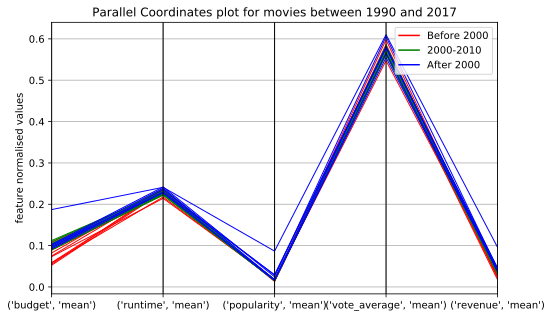

In [21]:
###plot in parallel co-ordinates
fig = plt.figure(figsize=(8,5))
ax = parallel_coordinates(df_results[['budget','runtime','popularity','vote_average','revenue','selected']],'selected',color=["red","green","blue"])
plt.setp(ax.lines, linewidth=1)
plt.ylabel("feature normalised values")
plt.title('Parallel Coordinates plot for movies between 1990 and 2017')
plt.show()

### Marking scheme

Correctness (39 marks): For each of the 5 questions a mark will be allocated for level of correctness (does it provide the right answer, is the logic right), according to the number in parentheses next to each question. Note that your code should work for any data input formatted in the same way as Movies\_tmdb.csv. E.g. if a random sample of 20,000 records was taken from Movies\_tmdb.csv, your code should provide a correct answer if this was instead used as the input.

Correctness will also take into account the readability and labelling provided for any plots and figures (plots should include title of the plot, labels/scale on axes, names of axes, and legends for colours where appropriate).

Coding style <span style="color:red">**(1 Mark)**</span>: Mark will be allocated for coding style. In particular the following aspects will be considered:

- Formatting of code (e.g. use of indentation and overall readability for a human)   
- Code modularity and flexibility. Use of functions or loops where appropriate, to avoid redundant or excessively verbose definitions of code.
- Use of python library functions (you should avoid reinventing logic if a library function can be used instead)
- Code commenting and clarity of logic. You should provide comments about the logic of our code for each question, so that it can be easily understood by the marker.

### Submission Instructions
Via the LMS, submit a jupyter notebook containing the code. Make sure you get a submission receipt via email. If you didn't get a receipt via email, this means we didn't receive your submission and it will be considered as late submission.

### Other
Extensions and Late Submission Penalties: If requesting an extension due to illness, please submit a medical certificate to the lecturer. If there are any other exceptional circumstances, please contact the lecturer with plenty of notice. Late submissions without an approved extension will attract a penalty of 10% of the marks available per 24hr period (or part thereof)
that it is late. E.g. A late submission will be penalised 2 marks if 4 hours late, 4 marks if 28 hours late, 6 marks if 50 hours late, 8 marks if 73 hours late, 10 marks if 106 hours late, etc.

Phase 1 is expected to require 20-24 hours work.

### Academic Honesty

You are expected to follow the academic honesty guidelines on the University website
https://academichonesty.unimelb.edu.au

### Further Information

A project discussion forum has also been created on the subject LMS. Please use this in the first instance if you have questions, since it will allow discussion and responses to be seen by everyone. The Phase 1 project page will also contain a list of frequently asked questions.